<img src="https://www.ikiam.edu.ec/img/logo-ikiam-grey.png" width=300 height=240 />

# DEBER 2 

## GBI6-2021II: BIOINFORMÁTICA

**Sheila Naomi Vinueza Ortiz** 



In [4]:
#subimos el archivo del tema de interes de pubmed 
f = open("pubmed-lungcancer-set.txt" , encoding="utf-8") 
text = f.read()
print(len(text))

f.close()

52658511


In [6]:
import re
import csv

In [7]:
text = re.sub(r'\n\s{6}', ' ', text)
print(text[:2000])

PMID- 21565397
OWN - NLM
STAT- MEDLINE
DCOM- 20111207
LR  - 20150616
IS  - 1474-547X (Electronic)
IS  - 0140-6736 (Linking)
VI  - 378
IP  - 9804
DP  - 2011 Nov 12
TI  - Small-cell lung cancer.
PG  - 1741-55
LID - 10.1016/S0140-6736(11)60165-7 [doi]
AB  - The incidence and mortality of small-cell lung cancer worldwide make this disease a  notable health-care issue. Diagnosis relies on histology, with the use of  immunohistochemical studies to confirm difficult cases. Typical patients are men  older than 70 years who are current or past heavy smokers and who have pulmonary and  cardiovascular comorbidities. Patients often present with rapid-onset symptoms due  to local intrathoracic tumour growth, extrapulmonary distant spread, paraneoplastic  syndromes, or a combination of these features. Staging aims ultimately to define  disease as metastatic or non-metastatic. Combination chemotherapy, generally  platinum-based plus etoposide or irinotecan, is the mainstay first-line treatment  for m

In [9]:
# Escribimos la expresion regular 
#Delimitamos (,) y salto de un espacio (\s) antes de que comienze un pais siempre tiene una coma y espacio en blanco 
#Extraemos informacion [A-Z] es porque un pais comienza siempre con mayuscula, 
#(+)tomamos todos los valos posibles [a-z] solo en minusculas
#{1,15} delimitamos el numero de caracteres para un pais que maximo 15
#.\ delimitamos el fin del pais que es siempre con un punto 
PaisCL = re.findall(r',\s([A-Z]+[a-z]{1,15})\.', text)
print (PaisCL)

['Belgium', 'Switzerland', 'Greece', 'Greece', 'Switzerland', 'Spain', 'Spain', 'Spain', 'Spain', 'Belgium', 'Spain', 'Spain', 'Spain', 'Taiwan', 'No', 'Sec', 'Taiwan', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'Iran', 'Iran', 'Poland', 'Iran', 'Dr', 'Dr', 'Mr', 'Mr', 'Dr', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'Finland', 'Inc', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'Inc', 'Italy', 'Italy', 'Italy', 'Italy', 'Massachusetts', 'Massachusetts', 'Massachusetts', 'Massachusetts', 'Massachusetts', 'Massachusetts', 'Massachusetts', 'Massachusetts', 'Massachusetts', 'California', 'California', 'California', 'California', 'Deutschland', 'Deutschland', 'Deutschland', 'Australia', 'Austra

In [11]:
import pandas as pd
%matplotlib inline
Coordenadas = pd.read_csv('PUNTOS.csv', engine='python', skipfooter=3)
Coordenadas.head(10)

,latitude,longitude,name
0,42.546245,1.601554,Andorra
1,23.424076,53.847818,United Arab Emirates
2,33.939110,67.709953,Afghanistan
3,17.060816,-61.796428,Antigua and Barbuda
4,18.220554,-63.068615,Anguilla
5,41.153332,20.168331,Albania
6,40.069099,45.038189,Armenia
7,12.226079,-69.060087,Netherlands Antilles
8,-11.202692,17.873887,Angola
9,-75.250973,-0.071389,Antarctica


In [13]:
Coordenadas.columns = ["Latitud", "Longitud", "Nombre"]
Coordenadas.head(10)

,Latitud,Longitud,Nombre
0,42.546245,1.601554,Andorra
1,23.424076,53.847818,United Arab Emirates
2,33.939110,67.709953,Afghanistan
3,17.060816,-61.796428,Antigua and Barbuda
4,18.220554,-63.068615,Anguilla
5,41.153332,20.168331,Albania
6,40.069099,45.038189,Armenia
7,12.226079,-69.060087,Netherlands Antilles
8,-11.202692,17.873887,Angola
9,-75.250973,-0.071389,Antarctica


In [15]:
datos_nombre = Coordenadas[Coordenadas.Nombre.isin(PaisCL)]
all_data =pd.concat([datos_nombre]).drop_duplicates().sort_values('Nombre')
all_data.head(10)

,Latitud,Longitud,Nombre
5,41.153332,20.168331,Albania
58,28.033886,1.659626,Algeria
10,-38.416097,-63.616672,Argentina
13,-25.274398,133.775136,Australia
12,47.516231,14.550072,Austria
15,40.143105,47.576927,Azerbaijan
22,25.930414,50.637772,Bahrain
18,23.684994,90.356331,Bangladesh
33,53.709807,27.953389,Belarus
19,50.503887,4.469936,Belgium


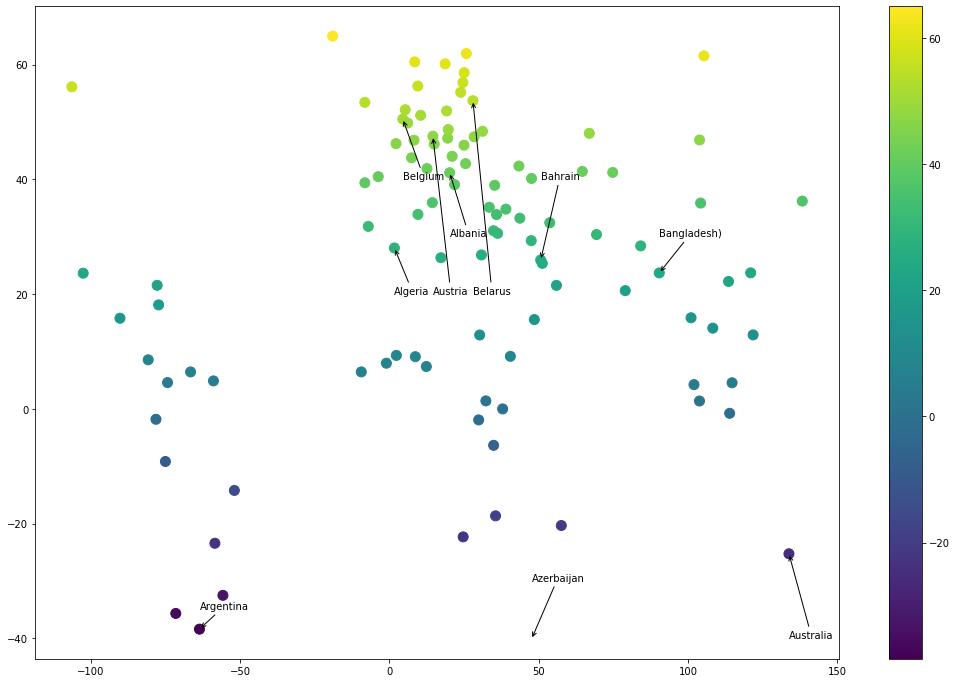

In [31]:
import matplotlib.pyplot as plt
plt.scatter(all_data.Longitud, all_data.Latitud, s=100, c=all_data.Latitud)
plt.colorbar()

ard = dict(arrowstyle="->")
plt.annotate('Albania', xy = (20.168331, 41.153332), 
               xytext = (20.168331, 30), arrowprops= ard)
plt.annotate('Algeria', xy = (1.659626, 28.033886), 
               xytext = (1.659626, 20), arrowprops= ard)
plt.annotate('Argentina', xy = (-63.616672, -38.416097), 
               xytext = (-63.616672,-35 ), arrowprops = ard)
plt.annotate('Australia', xy = (133.775136, -25.274398), 
               xytext = (133.775136, -40), arrowprops= ard)
plt.annotate('Austria', xy = (14.550072, 47.516231), 
               xytext = (14.550072, 20), arrowprops= ard)
plt.annotate('Azerbaijan', xy = (47.576927,-40.143105), 
               xytext = (47.576927, -30), arrowprops= ard)
plt.annotate('Bahrain', xy = (50.637772, 25.930414), 
               xytext = (50.637772, 40), arrowprops= ard)
plt.annotate('Bangladesh)', xy = (90.356331, 23.684994), 
               xytext = (90.356331, 30), arrowprops= ard)
plt.annotate('Belarus', xy = (27.953389, 53.709807), 
               xytext = (27.953389, 20), arrowprops= ard)
plt.annotate('Belgium', xy = (4.469936, 50.503887), 
               xytext = (4.469936, 40), arrowprops= ard)
params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0] * 3, plSize[1] * 3) )

plt.savefig("Map of Science.png")